The material on this notebook is found at https://spark.apache.org/docs/latest/structured-streaming-programming-guide.html

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import explode
from pyspark.sql.functions import split

spark = SparkSession \
    .builder \
    .appName("StructuredNetworkWordCount") \
    .getOrCreate()

In [2]:
# Create DataFrame representing the stream of input lines from connection to localhost:9999
lines = spark \
    .readStream \
    .format("socket") \
    .option("host", "localhost") \
    .option("port", 9999) \
    .load()

# Split the lines into words
words = lines.select(
   explode(
       split(lines.value, " ")
   ).alias("word")
)

# Generate running word count
wordCounts = words.groupBy("word").count()

```lines``` DataFrame represents an **unbounded table** containing the streaming text data. 

- This table contains one column of strings named “value”, and each line in the streaming text data becomes a row in the table. 
- ```lines``` DataFrame is the input table.
- Note, that this is not currently receiving any data as we are just setting up the transformation, and have not yet started it.


Built-in SQL functions - ```split``` and ```explode```, to split each line into multiple rows with a word each. 
Function ```alias``` is used to name the new column as “word”. 

wordCounts DataFrame is defined using the grouping by the unique values in the Dataset and counting them.
- This is the result table.
- Note: This is a streaming DataFrame which represents the running word counts of the stream.

In [ ]:
 # Start running the query that prints the running counts to the console
query = wordCounts \
    .writeStream \
    .outputMode("complete") \
    .format("console") \
    .start()

query.awaitTermination()

<img src=" 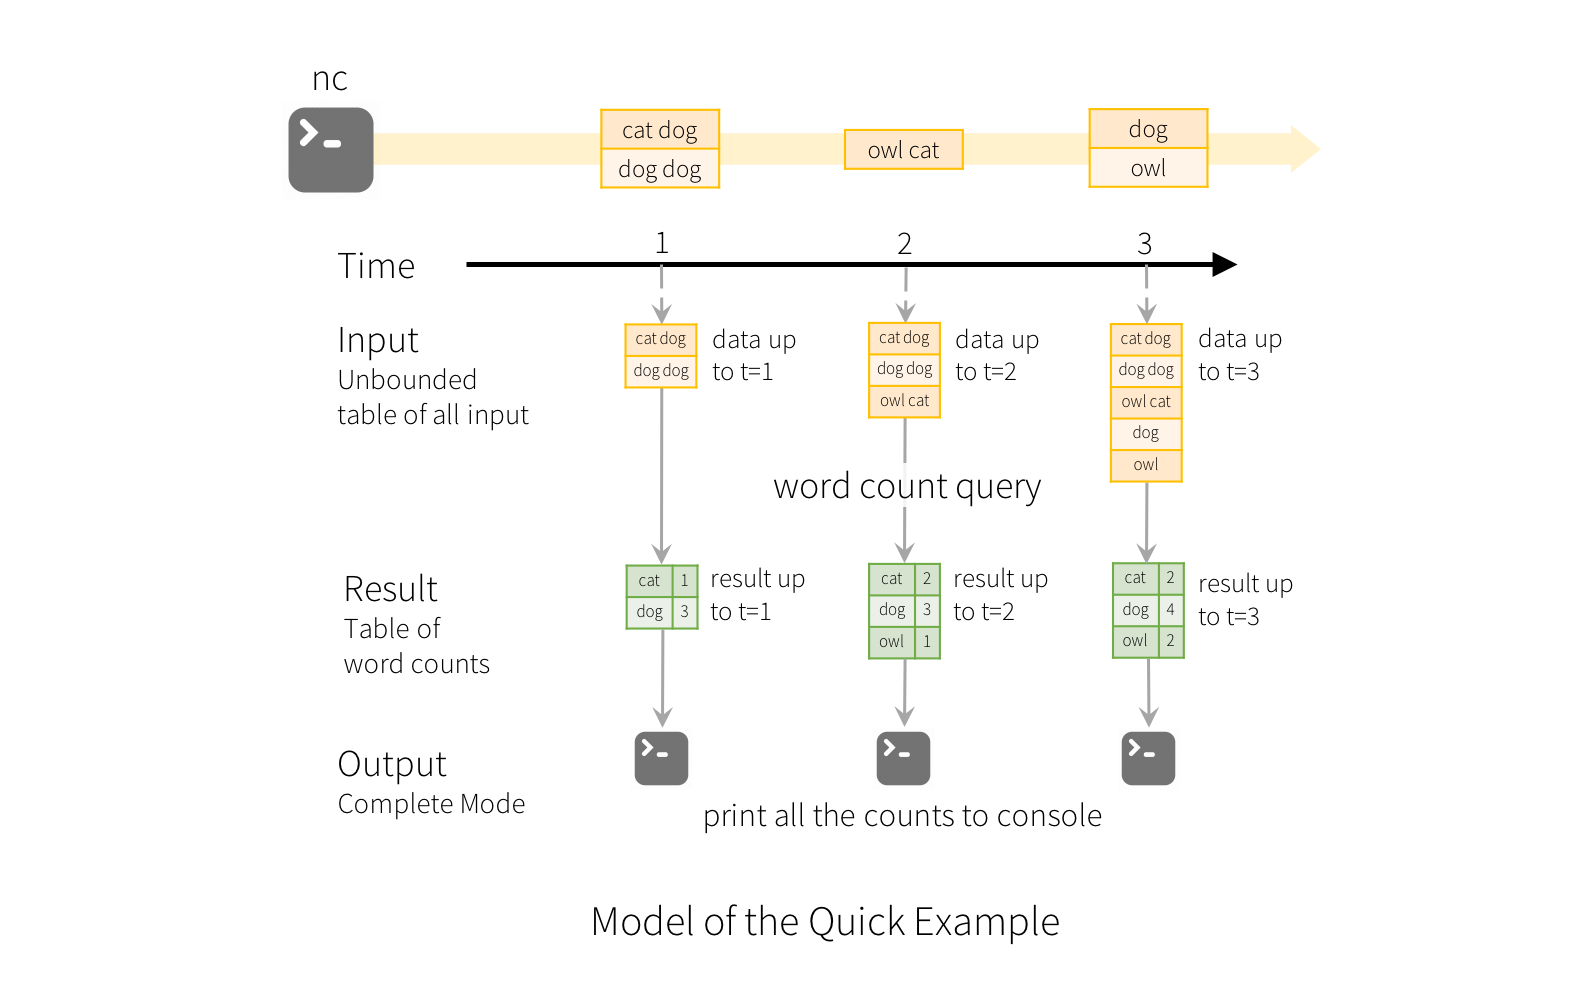" />